 ZOMATO RESTAURANT DATA ANALYSIS

=== CUISINE ANALYSIS ===
Top 5 Most Popular Cuisines:
North Indian: 3960
Chinese: 2735
Fast Food: 1986
Mughlai: 995
Italian: 764

=== PRICING AND RATINGS ANALYSIS ===
Cost Statistics:
count      9551.000000
mean       1199.210763
std       16121.183073
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

Rating Statistics:
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


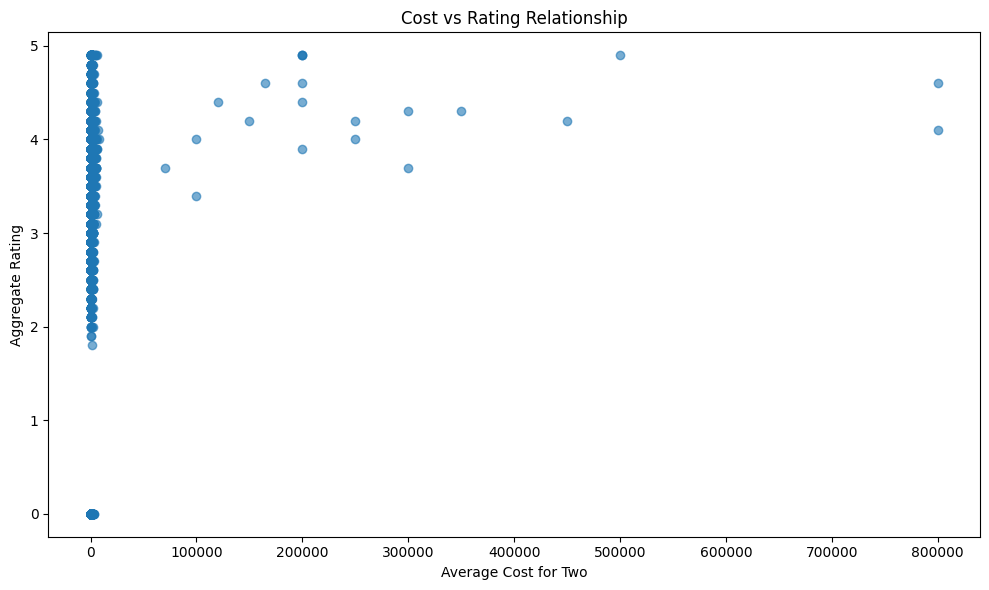


Correlation between Cost and Rating: 0.052

=== LOCATION ANALYSIS ===
Top 5 Cities by Restaurant Count:
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

Top 5 Cities by Average Rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64


Top 3 Highest Rated Restaurants:
                         Restaurant Name             City  Aggregate rating  Average Cost for two
                                    Ooma Mandaluyong City               4.9                  1500
Spiral - Sofitel Philippine Plaza Manila       Pasay City               4.9                  6000
                        Silantro Fil-Mex       Pasig City               4.9                   800

Top 3 Best Value Restaurants:
               Restaurant Name   City  Aggregate rating  Average Cost for two
                

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with encoding handling
try:
    df = pd.read_csv('zomato.csv', encoding='utf-8', on_bad_lines='skip')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('zomato.csv', encoding='latin-1', on_bad_lines='skip')
    except UnicodeDecodeError:
        df = pd.read_csv('zomato.csv', encoding='cp1252', on_bad_lines='skip')

def analyze_cuisine_patterns(df):
    print("\n=== CUISINE ANALYSIS ===")

    # Split cuisines and count frequency
    all_cuisines = []
    for cuisines in df['Cuisines'].dropna():
        cuisine_list = [c.strip() for c in cuisines.split(',')]
        all_cuisines.extend(cuisine_list)

    # Count cuisine frequency manually
    cuisine_counts = {}
    for cuisine in all_cuisines:
        cuisine_counts[cuisine] = cuisine_counts.get(cuisine, 0) + 1

    # Sort by count (descending)
    sorted_cuisines = sorted(cuisine_counts.items(), key=lambda x: x[1], reverse=True)

    print("Top 5 Most Popular Cuisines:")
    for cuisine, count in sorted_cuisines[:5]:
        print(f"{cuisine}: {count}")

    return dict(sorted_cuisines)

def analyze_pricing_and_ratings(df):
    print("\n=== PRICING AND RATINGS ANALYSIS ===")

    print("Cost Statistics:")
    print(df['Average Cost for two'].describe())

    print("\nRating Statistics:")
    print(df['Aggregate rating'].describe())

    # Single visualization - Cost vs Rating
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Average Cost for two'], df['Aggregate rating'], alpha=0.6)
    plt.title('Cost vs Rating Relationship')
    plt.xlabel('Average Cost for Two')
    plt.ylabel('Aggregate Rating')
    plt.tight_layout()
    plt.show()

    # Correlation analysis
    correlation = df['Average Cost for two'].corr(df['Aggregate rating'])
    print(f"\nCorrelation between Cost and Rating: {correlation:.3f}")

def analyze_location_patterns(df):
    print("\n=== LOCATION ANALYSIS ===")

    # City distribution
    city_counts = df['City'].value_counts()
    print("Top 5 Cities by Restaurant Count:")
    print(city_counts.head())

    # Average ratings by city
    city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
    print("\nTop 5 Cities by Average Rating:")
    print(city_ratings.head())
    print("\n")

def generate_insights(df, cuisine_counts):

    # Top rated restaurants
    top_rated = df.nlargest(3, 'Aggregate rating')[['Restaurant Name', 'City', 'Aggregate rating', 'Average Cost for two']]
    print("Top 3 Highest Rated Restaurants:")
    print(top_rated.to_string(index=False))

    # Best value restaurants (high rating, low cost)
    df['value_score'] = df['Aggregate rating'] / (df['Average Cost for two'] / 1000)
    best_value = df.nlargest(3, 'value_score')[['Restaurant Name', 'City', 'Aggregate rating', 'Average Cost for two']]
    print("\nTop 3 Best Value Restaurants:")
    print(best_value[['Restaurant Name', 'City', 'Aggregate rating', 'Average Cost for two']].to_string(index=False))

    # Summary statistics
    print(f"\n=== SUMMARY STATISTICS ===")
    print(f"Total restaurants: {len(df)}")
    print(f"Average rating: {df['Aggregate rating'].mean():.2f}")
    print(f"Average cost: {df['Average Cost for two'].mean():.0f}")

    # Find most popular cuisine
    if cuisine_counts:
        most_popular_cuisine = max(cuisine_counts.items(), key=lambda x: x[1])
        print(f"Most popular cuisine: {most_popular_cuisine[0]} ({most_popular_cuisine[1]} restaurants)")

    print(f"Most popular city: {df['City'].mode().iloc[0]}")
    print(f"Restaurants with table booking: {(df['Has Table booking'] == 'Yes').sum()}")

def main():
    print(" ZOMATO RESTAURANT DATA ANALYSIS")

    # Perform analyses
    cuisine_counts = analyze_cuisine_patterns(df)
    analyze_pricing_and_ratings(df)
    analyze_location_patterns(df)
    generate_insights(df, cuisine_counts)

if __name__ == "__main__":
    main()